In [3]:
import pandas as pd
df = pd.read_csv('/content/customer_churn_large_dataset.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


##Data Preprocessing

In [4]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36e0b3ac4d6637c7927bd546e9017e4a484296bd9bb9cebe969b3a3a0a00ed6d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file(output_file='report.html')

<ipython-input-8-1da3483089cb>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-9-ff44989b4639>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


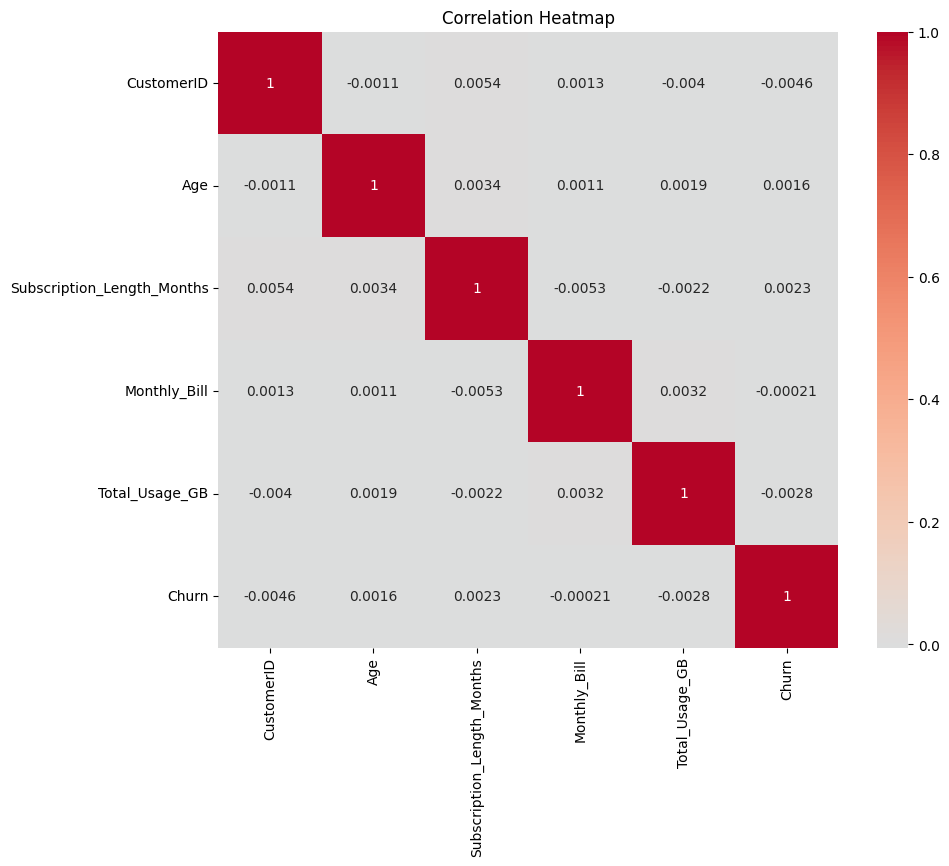

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
col = ['CustomerID','Name']
df = df.drop(columns=col,axis=1)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
75721,48,Female,Houston,11,88.48,492
80184,49,Male,New York,13,40.61,423
19864,31,Female,Los Angeles,5,33.01,276
76699,53,Male,New York,4,94.66,339
92991,23,Female,Los Angeles,24,82.21,304


##Label encoding

In [12]:
X_train = pd.get_dummies(X_train, columns=['Gender', 'Location'],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Gender', 'Location'],drop_first=True)

In [13]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75220,54,5,84.50,205,0,0,0,0,1
48955,28,24,82.06,239,1,0,0,0,1
44966,57,12,52.29,62,1,0,0,0,0
13568,19,19,32.57,173,1,1,0,0,0
92727,56,8,33.52,314,0,0,0,1,0


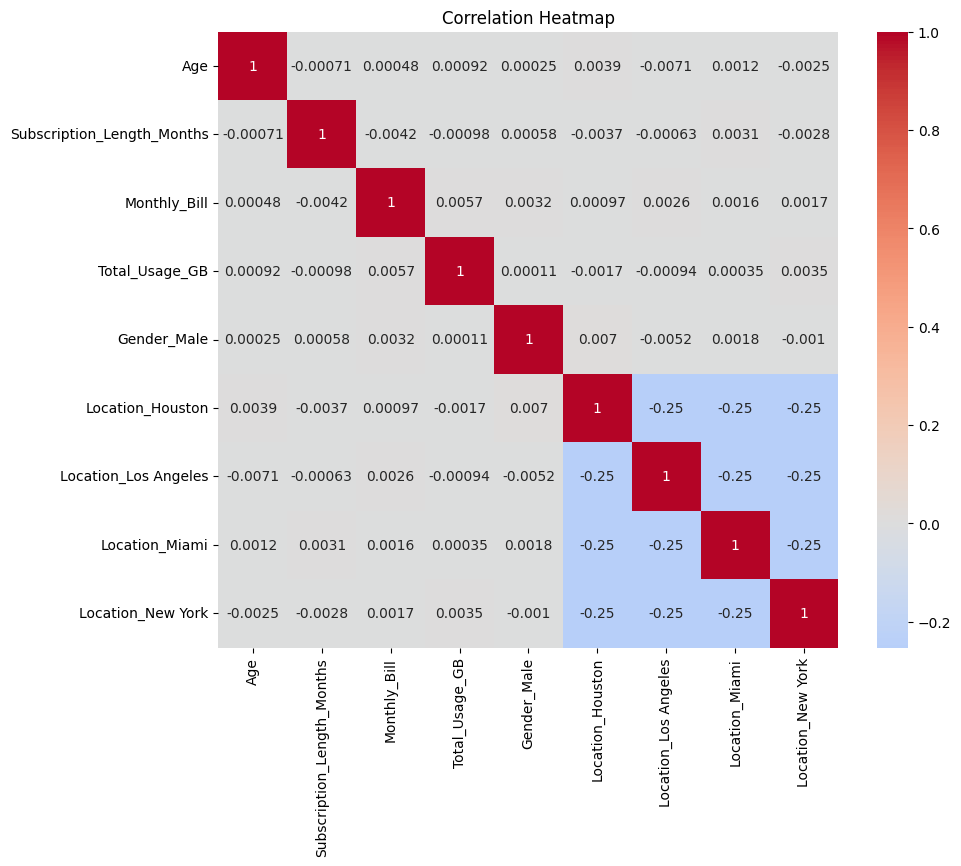

In [14]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

##Training

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=500, random_state=42)

classifier.fit(X_train_scaled, y_train)

# Predict churn on the scaled testing data
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Accuracy: 0.4929
Precision: 0.4886
Recall: 0.4785
F1-Score: 0.4835


In [16]:
from sklearn.linear_model import LogisticRegression

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict churn on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Model Accuracy: 0.5036
Precision: 0.4995
Recall: 0.3789
F1-Score: 0.4309


##Cross Validation

In [20]:
# importing the models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# list of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(random_state=0),xgb.XGBClassifier()]

In [21]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [22]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.508375  0.5021875 0.50425   0.5085625 0.4989375]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 50.45 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.502875  0.4985    0.501875  0.502875  0.4958125]
Acccuracy score of the  KNeighborsClassifier() = 50.04 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.4985    0.500625  0.4898125 0.5018125 0.5028125]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 49.87 %
---------------------------------------------------------------
Cross Validation accuracies for the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_

##Hyperparameter Tuning

In [24]:
models_list = [LogisticRegression(max_iter=10000), KNeighborsClassifier(), RandomForestClassifier(random_state=0),xgb.XGBClassifier()]

In [33]:
model_hyperparameters = {
    'logistic_param_grid': {
        'penalty': ['l1', 'l2'],  # Regularization type
        'C': [0.01, 0.1, 1, 5, 10],  # Regularization strength
        'solver': ['liblinear', 'saga'],  # Algorithm to use for optimization
        'max_iter': [100, 200, 300],  # Maximum number of iterations
        },
    'knn_param_grid' : {
        'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weight function for predictions
        'p': [1, 2],  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
        },
    'rf_param_grid' : {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
        },
    'xgb_param_grid' : {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
}



}

In [34]:
model_keys = list(model_hyperparameters.keys())

In [35]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X_train_scaled,y_train)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [36]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 5, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
---------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_

,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.502725,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', ..."
1,KNeighborsClassifier(),0.502262,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}"
2,RandomForestClassifier(random_state=0),0.502362,"{'max_depth': 10, 'n_estimators': 200}"
3,"XGBClassifier(base_score=None, booster=None, c...",0.503725,"{'learning_rate': 0.2, 'n_estimators': 300}"
